# Linear regression from scratch

**$ y = b + \sum_{i=0}^{n} w_{i}X_{i} $**
    
    
where <br>
- $y$ is Dependent variable, <br>
- $X$ is/are Independent variable(s), <br>
- $w$ is/are weight(s) of the model, <br>
- and $b$ is the bias <br>


### Cost function:
Mean-squared error: <br>
$J(w, b) = \frac{1}{n} \sum_{i=0}^{n} (y_{i} - (b + wX_{i}))^2$

### Gradient Descent:
Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

**$w_{i+1} = w_{i} - \alpha D_{w_{i}}$** <br>
**$b_{i+1} = b_{i} - \alpha D_{b_{i}}$**

where 
- $D_{w_{i}}$ is the partial derivative of the cost function with respect to $w$ in $i_{}^{th}$ iteration
- $D_{b_{i}}$ is the partial derivative of the cost function with respect to $b$ in $i_{}^{th}$ iteration
- $\alpha$ is the learning rate of the model
  

$D_{w} = \frac{-2}{n} \sum_{i=0}^{n} x_{i}(y_{i} - \^y_{i})$ <br>
$D_{b} = \frac{-2}{n} \sum_{i=0}^{n} (y_{i} - \^y_{i})$

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving towards minima of the loss function 

In [1]:
import numpy as np

In [2]:
class LinearRegression:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y

        for _ in range(self.epochs):
            self.update_weights()
        
    def update_weights(self):
        y_preds = self.predict(self.X)
        dw = -2 * (self.X.T).dot(self.y - y_preds) / self.m
        db = -2 * np.sum(self.y - y_preds) / self.m

        self.w -= self.learning_rate * dw
        self.b -= self.learning_rate * db

    def predict(self, X):
        return X.dot(self.w) + self.b  

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
salary_data = pd.read_csv('Dataset/salary_data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
salary_data.shape

(30, 2)

In [6]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
X = salary_data.iloc[:, :-1].values
y = salary_data.iloc[:, -1].values

In [8]:
X, y

(array([[ 1.1],
        [ 1.3],
        [ 1.5],
        [ 2. ],
        [ 2.2],
        [ 2.9],
        [ 3. ],
        [ 3.2],
        [ 3.2],
        [ 3.7],
        [ 3.9],
        [ 4. ],
        [ 4. ],
        [ 4.1],
        [ 4.5],
        [ 4.9],
        [ 5.1],
        [ 5.3],
        [ 5.9],
        [ 6. ],
        [ 6.8],
        [ 7.1],
        [ 7.9],
        [ 8.2],
        [ 8.7],
        [ 9. ],
        [ 9.5],
        [ 9.6],
        [10.3],
        [10.5]]),
 array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
         64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
         66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
        109431, 105582, 116969, 112635, 122391, 121872]))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=2)

In [17]:
model = LinearRegression(learning_rate=0.01, epochs=10000)


In [18]:
model.fit(X_train, y_train)

In [19]:
print(f'Weight: {model.w}\nBias: {model.b}')

Weight: [9512.94498763]
Bias: 23707.813246574984


In [20]:
test_data_preds = model.predict(X_test)

In [21]:
print(test_data_preds)

[ 36074.64173049  34172.05273297  66516.0656909   58905.7097008
  91249.72265873  80785.48317234 101713.96214512  52246.64820946
  42733.70322183  88395.83916244]


In [22]:
print(y_test)

[ 46205  39343  61111  57189  98273  93940 113812  60150  43525  91738]


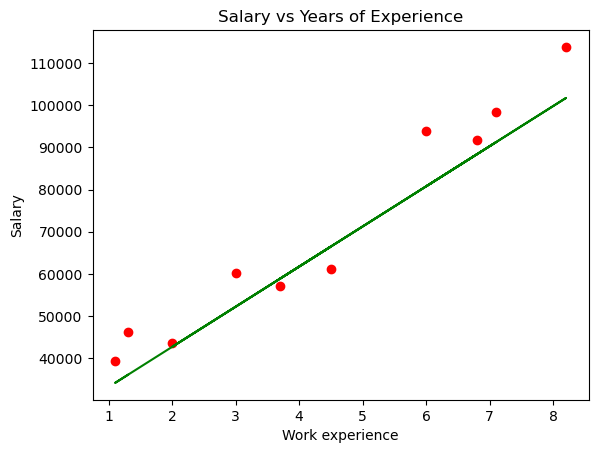

In [25]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, test_data_preds, color='green')
plt.xlabel('Work experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.show()